In [1]:
#Importing Required Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
#Loading the Dataset
df=pd.read_csv("C:/Users/youssef/Desktop/Data mining project/diabetes.csv")
#Exploratory Data Analysis
#the first 5 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns #type of columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.shape #shape of data set

(768, 9)

In [5]:
df.info() #information about data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe() #summary of the data set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#cleaning data 
df=df.drop_duplicates() #Dropping duplicate values
df.isnull().sum() #check null values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [9]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

C:\Users\youssef\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

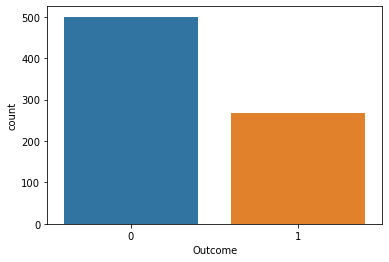

In [10]:
#Box Plot :- to analyse the distribution and see the outliers
#Scatter plots :- to understand relationship between any two variables
#Pair plot :- to create scatter plot between all the variables
sns.countplot('Outcome',data=df) #to see if the dataset is balanced or not

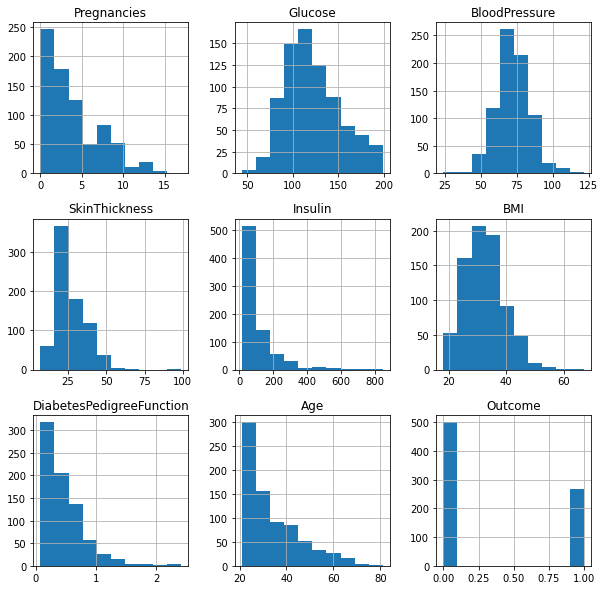

In [11]:
#to see if data is normally distributed or skewed
df.hist(bins=10,figsize=(10,10))
plt.show()
#We observe that only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

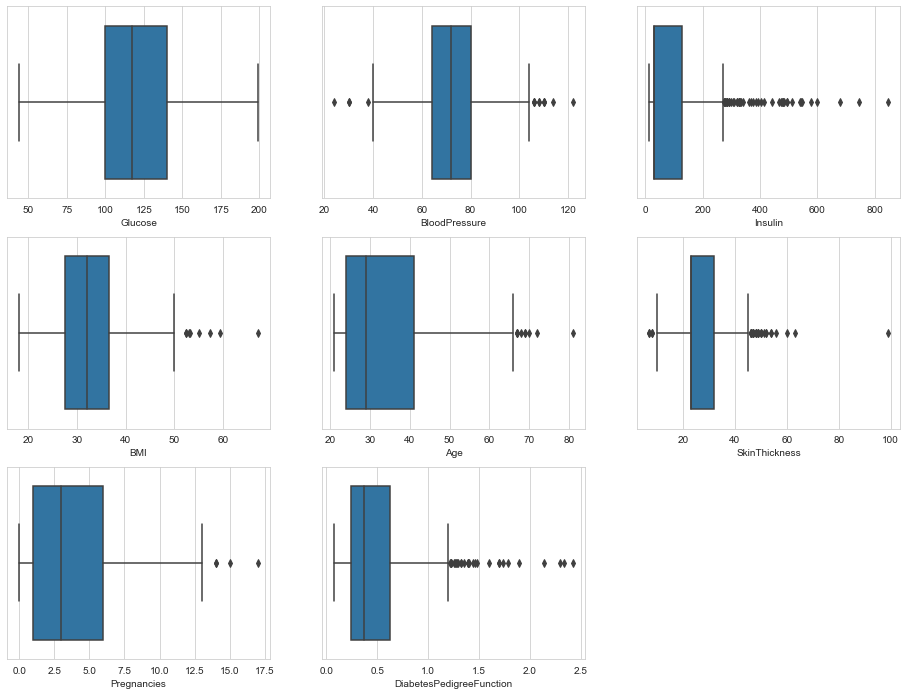

In [12]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

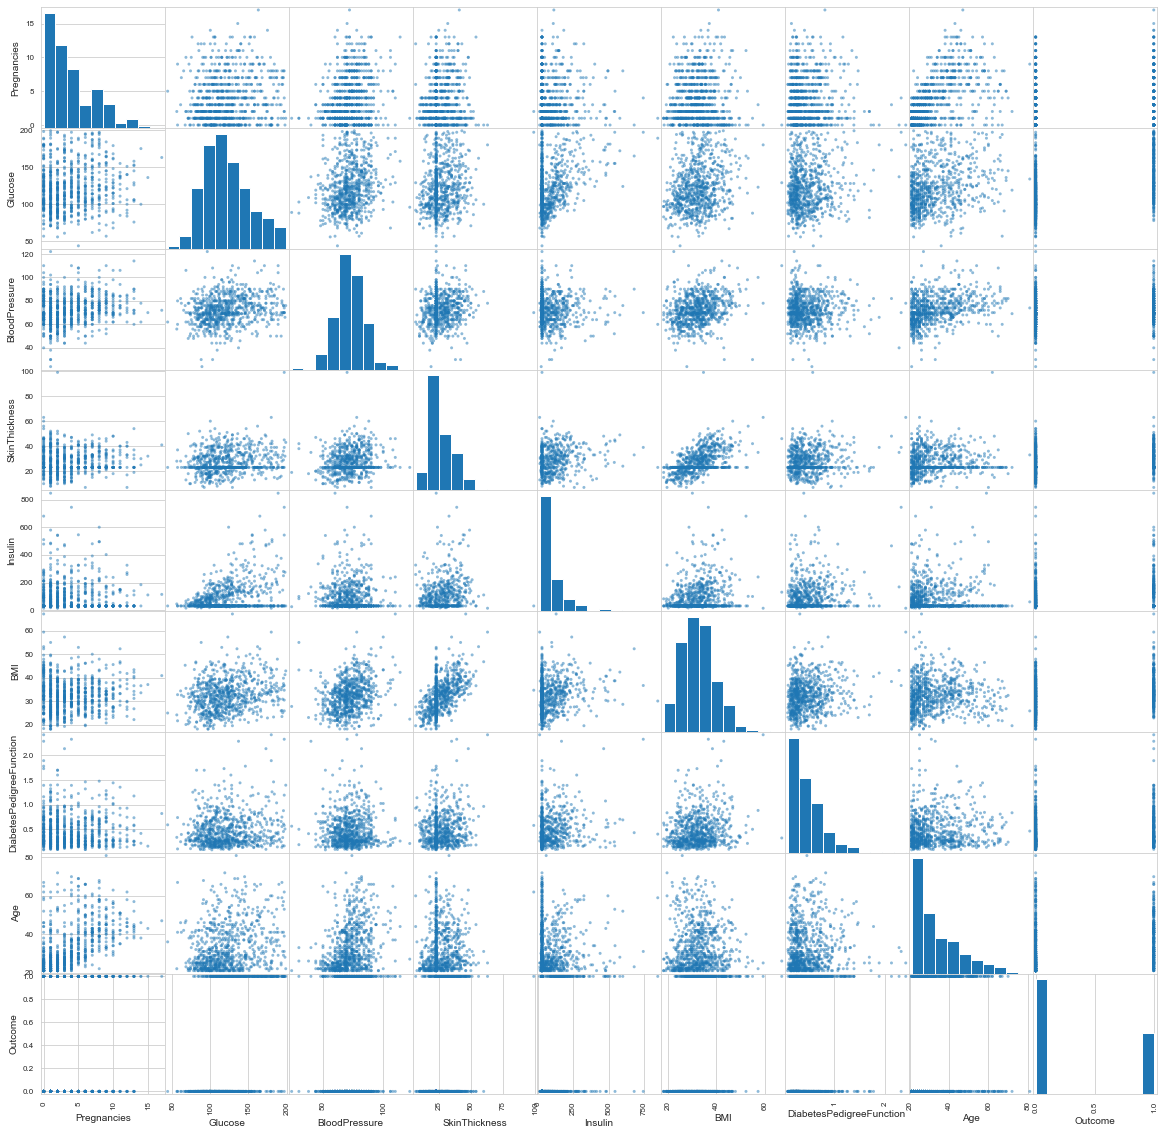

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));

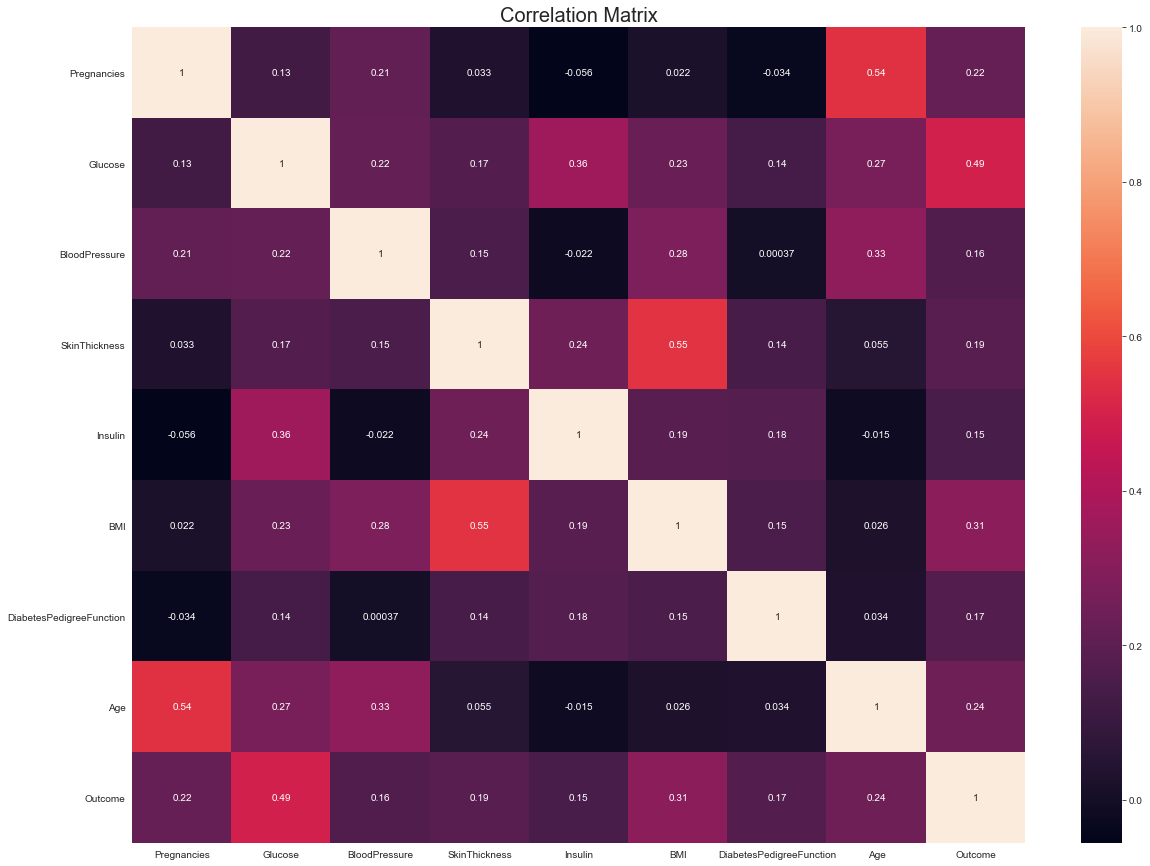

In [14]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, ax=ax)
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

<AxesSubplot:>

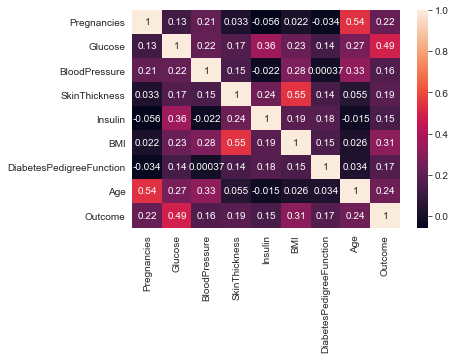

In [15]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

In [16]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [17]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

C:\Users\youssef\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


<AxesSubplot:xlabel='SkinThickness'>

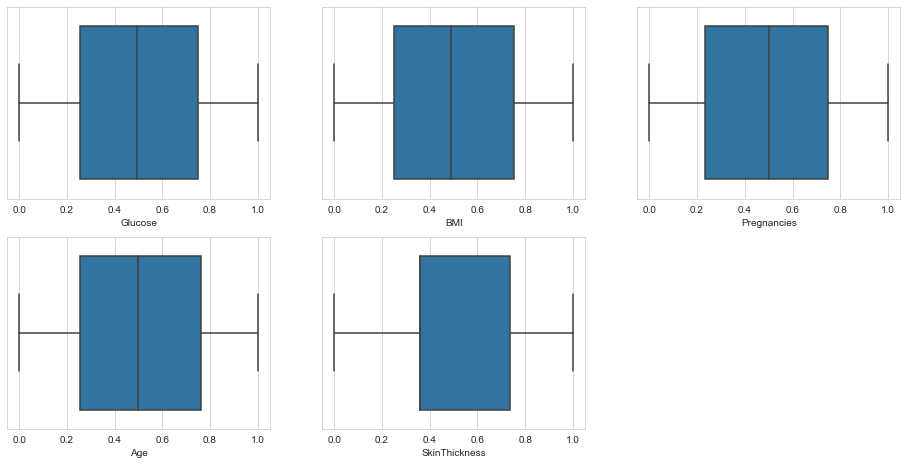

In [18]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

In [19]:
target_name='Outcome'
y= df_new[target_name]#given predictions - training data 
X=df_new.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [20]:
X.head() # contains only independent features 

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [21]:
y.head()#contains dependent feature

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test

In [23]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [24]:
X_test.shape,y_test.shape

((154, 5), (154,))

# Naive Bayes:


In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0, -2, num= 100)
}

nbModel_grid = GridSearchCV(estimator = GaussianNB(), param_grid = param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [26]:
best_model = nbModel_grid.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [27]:
nb_pred = best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       107
         1.0       0.64      0.53      0.58        47

    accuracy                           0.77       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154



<AxesSubplot:>

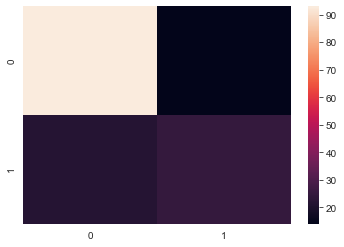

In [28]:
# test the model performance
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report is:\n",classification_report(y_test,nb_pred))
sns.heatmap(confusion_matrix(y_test,nb_pred))

# Support vector machines:

In [29]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

In [30]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid'] # the kernel function to use which is used to transform the input data into a higher-dimensional space where it can be separated by the SVM algorithm.
C = [50, 10, 1.0, 0.1, 0.01] # A hyperparameter that controls the penalty for misclassifying training examples in the SVM algorithm
gamma = ['scale'] #A hyperparameter that controls the width of the kernel function in the SVM algorithm

In [31]:
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # we use stratified k fold because it is better with imbalanced data, it insures that each fold have the same proportion of the output class
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [32]:
df_test = df
X_my = df_test.drop('Outcome', axis=1)
y_my = df_test['Outcome']

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X_my,y_my,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test

In [34]:
grid_result = grid_search.fit(X_train, y_train)

In [35]:
svm_pred=grid_result.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       107
           1       0.76      0.53      0.62        47

    accuracy                           0.81       154
   macro avg       0.79      0.73      0.75       154
weighted avg       0.80      0.81      0.79       154


 Confusion Matrix:



<AxesSubplot:>

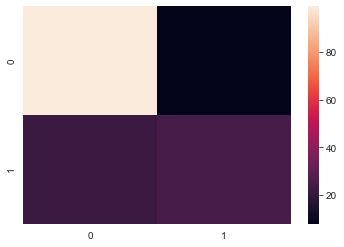

In [36]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

# Decision Tree:

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [38]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [39]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [40]:
best_model=grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [41]:
dt_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86       107
           1       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154


 F1:
 0.5675675675675675

 Precision score is:
 0.7777777777777778

 Recall score is:
 0.44680851063829785

 Confusion Matrix:



<AxesSubplot:>

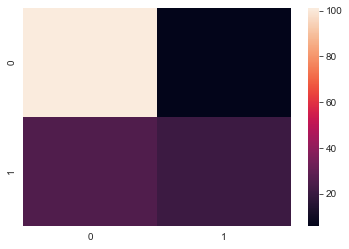

In [42]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred))